# 5.4 Improving generalization

Once our model shows some generalization and can overfit, it's time to maximize the generalization.

## 5.4.1 Dataset curation

- We know generalization originates from the latent structure of the data.
- If it smoothly interpolates between samples, you will be able to train a model that generalizes.
  - If data is fundamentally discrete, DL will not help you.
  - DL is curve-fitting, not magic.
- Spending more resources on data collection yields much better return than on spending them on developing a model.
1. Have enough data. Need a *dense sampling* of the input-cross-output space. Some problems that seem impossible at first become solvable with a larger dataset.
2. Minimize labeling errors.
3. Clean data and deal with missing values.
4. Do feature selection if you have many features.

***Feature engineering*** is an important way to improve generalization potential of your data.

## 5.4.2 Feature engineering

*What is feature engineering?*

The process of using your own knowledge about the data and about the machine learning algorithm at hand (in this case, a neural network) to make the algorithm work better by applying hardcoded (non-learned) transformations to the data before it goes into the model.

- Data needs to be presented to the model so as to make the model's job easier.
- If you understand the problem at a higher level, you can come up with new and better input features for the ML algorithm.
- Essence of feature engineering: making the problem easier by expressing it in a simpler way. *Make the latent manifold smoother, simpler, better organized*. This requires understanding the problem in depth.

NNs can automatically extract useful features from raw data. But you still need to worry about feature engineering, because:
1. Good features help solve problems elegantly, and using fewer resources.
2. Good features can solve problems with far less data.



## 5.4.3 Using early stopping

- In DL, we use models that are highly overparameterized have more degrees of freedom than the minimum necessary to fit the latent manifold of the data.
- Not an issue——you never fully fit a DL model. Such a fit wouldn't generalize.
- Finding the exact point/boundary ebtween underfit and ovefit is most effective way to improve generalization.

In previous examples:
- Start by training models for longer than needed to figure out the best number of epochs, then we would retrain the model for the new # of epochs.
- There is a redundancy here, which can be very expensive.
- Alternative: save model at the end of each epoch, and once we get to the best epoch, use the closest saved model.
- This is done in Keras with an `EarlyStopping` callback: interrupts the training as son as we hit the best epoch (validation metrics stop improving).

## 5.4.4 Regularizing your model

- *Regularization techniques* are a set of practices that actively impede the ability of the model to perfectly fit the training data.
- By this, our goal is to make the model perform better on validation data and thus improve the generalization.
- This is called "regularizing" the model:
  - Makes model simpler, more "regular"
  - Makes curve smoother, more "generic"
- Thus it is better generalizes by closely approximating the latent manifold of the data.

Notes:
- Regula^n process should always be guided by an accurate evaluation procedure.
- You can only achieve generel^n if you can measure it hahaha!

Let's look at some techniques.

### Technique #1: Reducing the network's size

- We know, a model that is too small will not overfit.
- Thus, a simple way to reduce (mitigate) overfitting is by reducing the network's size.
> Decrease network size = less memorization resources = less ability to memorize tranining data = less overfitting.
- Model gotta resort to learning compressed representaions that have predictive power regarding the targets.
- BUT, model should'nt be too big or too small: a compromise is to be made between *too much capacity* and *too less capacity*.

- Alas, there's no magic formula to calculate the perfect size.
- Gotta evaluate the model on a variety of different architectures.

General workflow:
1. Start with relatively less layers and units.
2. Increase the size until we witness diminishing returns on validation loss.

Let's try this on the IMDB example:

### Original model

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras

In [2]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), _ = imdb.load_data(num_words=10000)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
train_data = vectorize_sequences(train_data)

In [4]:
from tensorflow.keras import layers

In [5]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

history_original = model.fit(train_data, train_labels,
                             epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 99ms/step - accuracy: 0.6950 - loss: 0.6057 - val_accuracy: 0.8521 - val_loss: 0.4140
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.8924 - loss: 0.3552 - val_accuracy: 0.8859 - val_loss: 0.3142
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.9146 - loss: 0.2526 - val_accuracy: 0.8848 - val_loss: 0.2910
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.9362 - loss: 0.1983 - val_accuracy: 0.8917 - val_loss: 0.2738
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.9451 - loss: 0.1677 - val_accuracy: 0.8838 - val_loss: 0.2881
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.9564 - loss: 0.1361 - val_accuracy: 0.8861 - val_loss: 0.2875
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.9616 - loss: 0.1209 - val_accuracy: 0.8849 - val_loss: 0.2943
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.9708 - loss: 0.1002 - val_accuracy: 0.8809 - v

### Now let's reduce the model size

In [6]:
model = keras.Sequential([
    layers.Dense(4, activation="relu"), # only 4 units per layer
    layers.Dense(4, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_smaller_model = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 79ms/step - accuracy: 0.7254 - loss: 0.6049 - val_accuracy: 0.8606 - val_loss: 0.4471
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step - accuracy: 0.8849 - loss: 0.3999 - val_accuracy: 0.8764 - val_loss: 0.3598
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.9113 - loss: 0.3041 - val_accuracy: 0.8860 - val_loss: 0.3128
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.9250 - loss: 0.2465 - val_accuracy: 0.8837 - val_loss: 0.2978
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.9384 - loss: 0.2092 - val_accuracy: 0.8914 - val_loss: 0.2794
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.9452 - loss: 0.1804 - val_accuracy: 0.8891 - val_loss: 0.2775
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.9536 - loss: 0.1599 - val_accuracy: 0.8888 - val_loss: 0.2748
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.9600 - loss: 0.1382 - val_accuracy: 0.8848 - v

### Plotting val losses for both models:

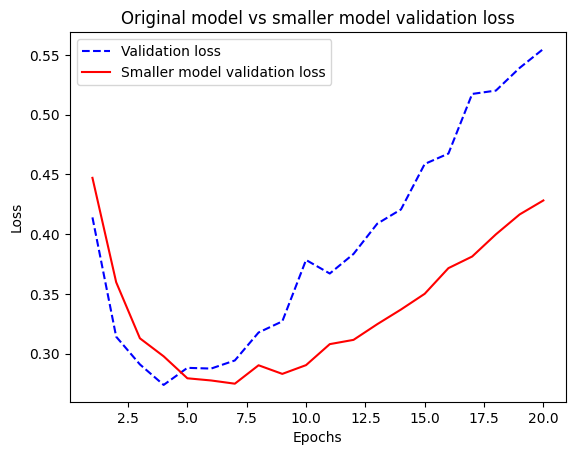

In [7]:
import matplotlib.pyplot as plt

# Get history dictionaries from both models
history_dict = history_original.history
history_dict_smaller = history_smaller_model.history

# Get loss values
val_loss_values = history_dict["val_loss"]
val_loss_values_smaller = history_dict_smaller["val_loss"]

epochs = range(1, len(val_loss_values) + 1)

# Original model plots
plt.plot(epochs, val_loss_values, "b--", label="Validation loss")  #

# Add smaller model validation loss (using red color to distinguish)
plt.plot(epochs, val_loss_values_smaller, "r", label="Smaller model validation loss")  # solid red line

plt.title("Original model vs smaller model validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

- Smaller model starts to overfit later.
- Its performance also degrades more slowly once it starts overfitting.

Now let's modify another model with more capacity (much more!):

### Version of model with higher capacity

In [8]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(512, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_larger_model = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 12s 316ms/step - accuracy: 0.6298 - loss: 0.6518 - val_accuracy: 0.8550 - val_loss: 0.3722
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 10s 343ms/step - accuracy: 0.8668 - loss: 0.3313 - val_accuracy: 0.8841 - val_loss: 0.2834
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 10s 328ms/step - accuracy: 0.8990 - loss: 0.2523 - val_accuracy: 0.8332 - val_loss: 0.4239
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 8s 282ms/step - accuracy: 0.9091 - loss: 0.2166 - val_accuracy: 0.8719 - val_loss: 0.3217
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 11s 293ms/step - accuracy: 0.9370 - loss: 0.1601 - val_accuracy: 0.8382 - val_loss: 0.4616
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 11s 317ms/step - accuracy: 0.9450 - loss: 0.1333 - val_accuracy: 0.8823 - val_loss: 0.3466
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 11s 326ms/step - accuracy: 0.9732 - loss: 0.0821 - val_accuracy: 0.8828 - val_loss: 0.3644
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 9s 277ms/step - accuracy: 0.9825 - loss: 0.0591 - val_accura

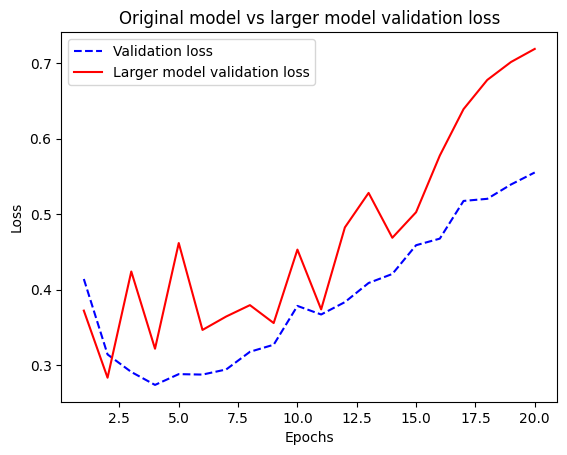

In [9]:
# Get history dictionaries from both models
# history_dict = history_original.history
history_dict_larger = history_larger_model.history

# Get loss values
val_loss_values = history_dict["val_loss"]
val_loss_values_larger = history_dict_larger["val_loss"]

epochs = range(1, len(val_loss_values) + 1)

# Original model plots
plt.plot(epochs, val_loss_values, "b--", label="Validation loss")  #


plt.plot(epochs, val_loss_values_larger, "r", label="Larger model validation loss")  # solid red line

plt.title("Original model vs larger model validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

- Bigger model starts overfitting immediately.
- It overfits much severly.
- Val_loss for this is also noisier.
- More capacity = quicker to model data (low training loss) = more susceptible to overfitting (large diff. b/w training and val losses).

### Technique #2: Adding weight regularization

- DL version of *Occam's razor*: simpler models are less likely to overfit the data than complex ones.
- *Simple model*: distribution of params has less entropy (model with few params).
- Common way to reduce overfitting: put constraints on the complexity of the model by forcing the weights to take up only small values → making the distribution of weights more *regular*. This is called ***weight regularization***.
  - Done by adding——a cost associated to with having large weights——to the loss function.

Two flavors of weight regularization:
1. ***L1 regularization***: cost added $∝$ *absolute value of the weight coefficients* (L1 norm of the weights).
2. ***L2 regularization***: cost added $∝$ *square of the value of the weight coefficients* (L2 norm of the weights).
  - L2 regularization is also called *weight decay*


Implemented in Keras using the *weight regularizer instances* to layers as keyword arguments.

Let's add L2:

### Adding L2 weight regularization to the model

In [10]:
from tensorflow.keras import regularizers
model = keras.Sequential([
    layers.Dense(16, kernel_regularizer=regularizers.l2(0.002),
                 activation="relu"),
    layers.Dense(16, kernel_regularizer=regularizers.l2(0.002),
                 activation="relu"),
    layers.Dense(1, activation="sigmoid")

])

In [11]:
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

history_l2_reg = model.fit(
    train_data, train_labels,
    epochs=20,
    batch_size=512, validation_split=0.4
)

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 6s 121ms/step - accuracy: 0.6508 - loss: 0.7159 - val_accuracy: 0.8465 - val_loss: 0.5099
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 59ms/step - accuracy: 0.8787 - loss: 0.4519 - val_accuracy: 0.8701 - val_loss: 0.4124
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - accuracy: 0.9064 - loss: 0.3568 - val_accuracy: 0.8897 - val_loss: 0.3673
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - accuracy: 0.9275 - loss: 0.3043 - val_accuracy: 0.8823 - val_loss: 0.3668
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.9360 - loss: 0.2762 - val_accuracy: 0.8868 - val_loss: 0.3571
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 61ms/step - accuracy: 0.9438 - loss: 0.2589 - val_accuracy: 0.8860 - val_loss: 0.3574
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - accuracy: 0.9479 - loss: 0.2493 - val_accuracy: 0.8767 - val_loss: 0.3815
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.9482 - loss: 0.2399 - val_accuracy: 0.8853 - 

`l2(0.002)` means every weight matrix coefficient will add `0.002 * weight_coefficient_value ** 2` to the total loss of the model.

Note: since this is only added during training, the training loss will be much higher than at testing.

Let's plot this:

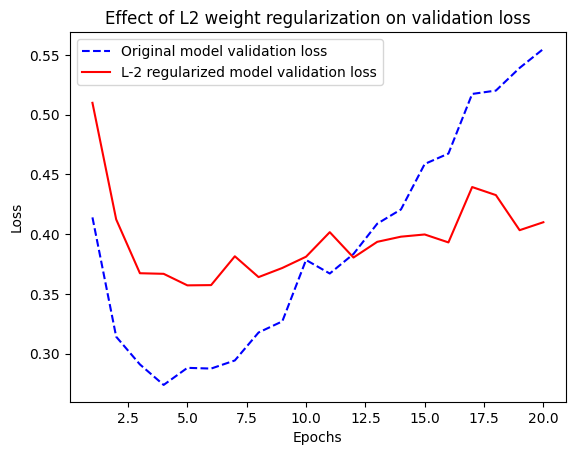

In [13]:
# Get history dictionaries from both models
# history_dict = history_original.history
history_dict_l2 = history_l2_reg.history

# Get loss values
val_loss_values = history_dict["val_loss"]
l2_val_loss_values = history_dict_l2["val_loss"]

epochs = range(1, len(val_loss_values) + 1)

# Original model plots
plt.plot(epochs, val_loss_values, "b--", label="Original model validation loss")  #


plt.plot(epochs, l2_val_loss_values, "r", label="L-2 regularized model validation loss")  # solid red line

plt.title("Effect of L2 weight regularization on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

Impact of L2 regularization penalty: model becomees much more resistant to overfitting than the original model, even though both have the same number of params.

Let's try:
1. L1 regularization.
2. L1 and L2 both simultaneously.

### L1 regularization

In [14]:
model = keras.Sequential([
    layers.Dense(16, kernel_regularizer=regularizers.l1(0.001),
                 activation="relu"),
    layers.Dense(16, kernel_regularizer=regularizers.l2(0.001),
                 activation="relu"),
    layers.Dense(1, activation="sigmoid")

])

model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

history_l1_reg = model.fit(
    train_data, train_labels,
    epochs=20,
    batch_size=512, validation_split=0.4
)

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 78ms/step - accuracy: 0.6611 - loss: 1.5803 - val_accuracy: 0.8063 - val_loss: 0.6809
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - accuracy: 0.8231 - loss: 0.6522 - val_accuracy: 0.8461 - val_loss: 0.6093
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - accuracy: 0.8443 - loss: 0.5891 - val_accuracy: 0.8457 - val_loss: 0.5799
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 61ms/step - accuracy: 0.8516 - loss: 0.5681 - val_accuracy: 0.8578 - val_loss: 0.5604
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 78ms/step - accuracy: 0.8656 - loss: 0.5390 - val_accuracy: 0.8484 - val_loss: 0.5605
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.8666 - loss: 0.5333 - val_accuracy: 0.8627 - val_loss: 0.5376
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - accuracy: 0.8696 - loss: 0.5196 - val_accuracy: 0.8250 - val_loss: 0.5896
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.8676 - loss: 0.5187 - val_accuracy: 0.8658 - v

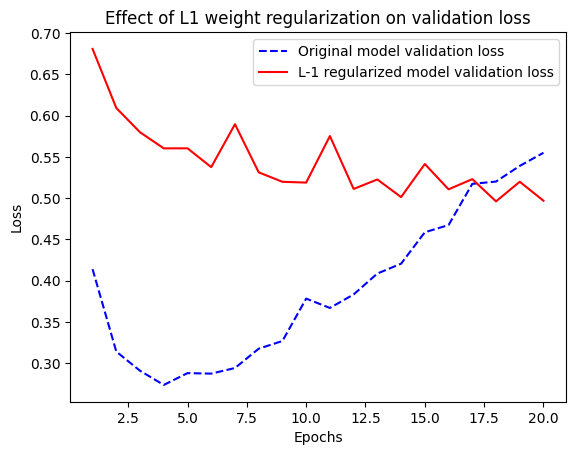

In [16]:
# Get history dictionaries from both models
# history_dict = history_original.history
history_dict_l1 = history_l1_reg.history

# Get loss values
val_loss_values = history_dict["val_loss"]
l1_val_loss_values = history_dict_l1["val_loss"]

epochs = range(1, len(val_loss_values) + 1)

# Original model plots
plt.plot(epochs, val_loss_values, "b--", label="Original model validation loss")  #


plt.plot(epochs, l1_val_loss_values, "r", label="L-1 regularized model validation loss")  # solid red line

plt.title("Effect of L1 weight regularization on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

### L1 and L2 simultaneously



In [17]:
model = keras.Sequential([
    layers.Dense(16, kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001),
                 activation="relu"),
    layers.Dense(16, kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001),
                 activation="relu"),
    layers.Dense(1, activation="sigmoid")

])

model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

history_l1_l2_reg = model.fit(
    train_data, train_labels,
    epochs=20,
    batch_size=512, validation_split=0.4
)

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 94ms/step - accuracy: 0.6401 - loss: 1.6435 - val_accuracy: 0.8146 - val_loss: 0.7508
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - accuracy: 0.8349 - loss: 0.7150 - val_accuracy: 0.8428 - val_loss: 0.6800
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.8350 - loss: 0.6598 - val_accuracy: 0.8294 - val_loss: 0.6506
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 0.8414 - loss: 0.6282 - val_accuracy: 0.8539 - val_loss: 0.6137
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 68ms/step - accuracy: 0.8544 - loss: 0.5975 - val_accuracy: 0.8528 - val_loss: 0.5994
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 60ms/step - accuracy: 0.8572 - loss: 0.5846 - val_accuracy: 0.8557 - val_loss: 0.5869
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.8572 - loss: 0.5741 - val_accuracy: 0.8467 - val_loss: 0.5873
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - accuracy: 0.8582 - loss: 0.5688 - val_accuracy: 0.8572 - v

Let's plot all the 3 validation losses together:

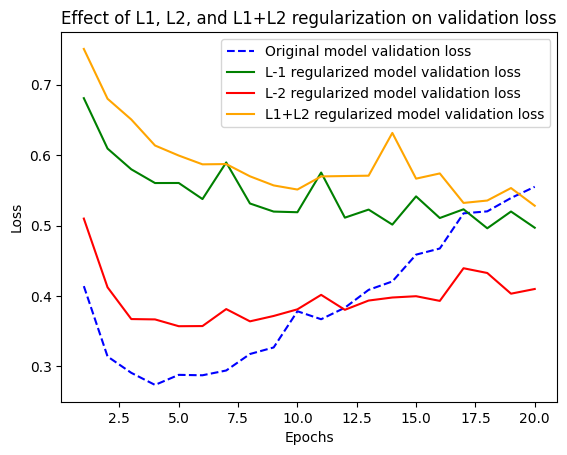

In [20]:
# history_dict = history_original.history
history_dict_l1_l2 = history_l1_l2_reg.history

# Get loss values
val_loss_values = history_dict["val_loss"]
l1_l2_val_loss_values = history_dict_l1_l2["val_loss"]

epochs = range(1, len(val_loss_values) + 1)

# Original model plots
plt.plot(epochs, val_loss_values, "b--", label="Original model validation loss")  #

plt.plot(epochs, l1_val_loss_values, "g", label="L-1 regularized model validation loss")  # solid green line

plt.plot(epochs, l2_val_loss_values, "r", label="L-2 regularized model validation loss")  # solid red line

plt.plot(epochs, l1_l2_val_loss_values, "orange", label="L1+L2 regularized model validation loss")  # solid red line




plt.title("Effect of L1, L2, and L1+L2 regularization on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

- Weight reg^n is used mostly for smaller DL models.
- Larger models are so overparameterized that constraints on weight values do not have much effect.
  - In such cases, we use a difference regulariaztion technique, called *dropout*.

### Technique #3: Dropout

- Developed by Geoff Hinton
- Consists of randomly dropping out (setting to 0) a number of output features of the layer during training.
- Dropout rate: fraction of features that are zeroed out (b/w 0.2 - 0.5).
- At testing, no units are dropped, instead they are scaled down by a factor = droupout rate to balance for the fact that more neurons were active at training than at testing.
- This can also be done by doig both operations during training itself and leave the output at testing unchanged (this is how it's done in practice). *Here we scale up rather than scale down*.
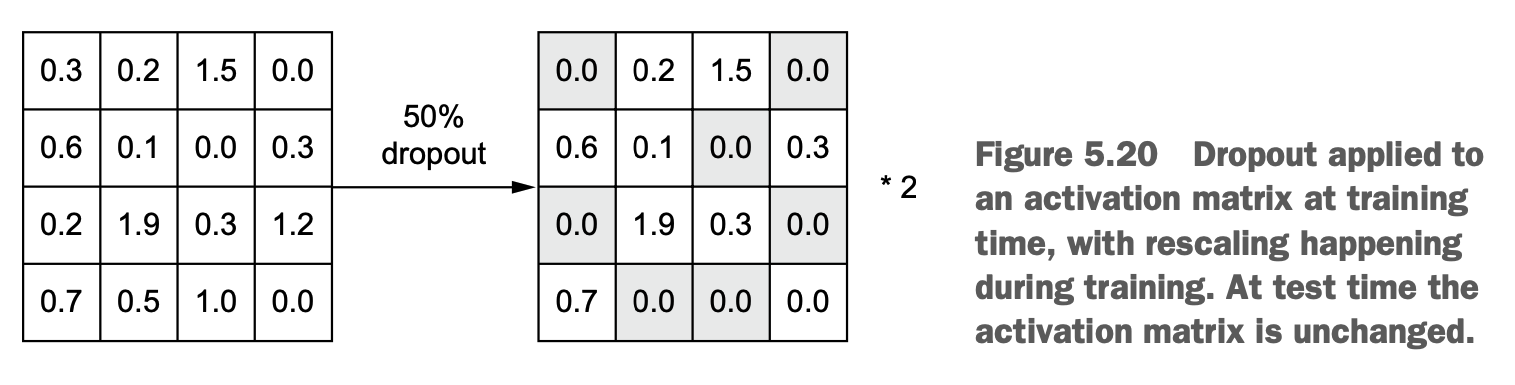

Story behind dropout:

- **Inspiration Source**: Geoffrey Hinton was inspired by a fraud-prevention mechanism used by banks where employees were frequently rotated to prevent collusion.

- **Observation**: Hinton noticed that this rotation required cooperation between employees to commit fraud, which was difficult due to their random movement.

- **Connection to Neural Networks**: This insight led Hinton to apply a similar concept to neural networks by introducing randomness to prevent overfitting.

- **Dropout Mechanism**: Hinton introduced the idea of randomly removing a subset of neurons during training for each example.

- **Purpose**: The randomness, or noise, disrupts insignificant patterns (termed conspiracies by Hinton) that the model might otherwise memorize.

- **Benefit**: This mechanism improves generalization by reducing the model's tendency to overfit to the training data.

### Adding dropout to the IMDB model



In [21]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5), # applied to the output layer right before it
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")

])

model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

history_dropout = model.fit(
    train_data, train_labels,
    epochs=20,
    batch_size=512, validation_split=0.4
)

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 9s 251ms/step - accuracy: 0.5639 - loss: 0.6773 - val_accuracy: 0.8060 - val_loss: 0.5791
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 59ms/step - accuracy: 0.7419 - loss: 0.5709 - val_accuracy: 0.8598 - val_loss: 0.4562
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.8034 - loss: 0.4821 - val_accuracy: 0.8776 - val_loss: 0.3845
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - accuracy: 0.8431 - loss: 0.4154 - val_accuracy: 0.8826 - val_loss: 0.3403
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.8732 - loss: 0.3555 - val_accuracy: 0.8868 - val_loss: 0.3103
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.8899 - loss: 0.3172 - val_accuracy: 0.8892 - val_loss: 0.2958
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.9073 - loss: 0.2825 - val_accuracy: 0.8907 - val_loss: 0.2928
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - accuracy: 0.9161 - loss: 0.2600 - val_accuracy: 0.8898 - 

Plot it:

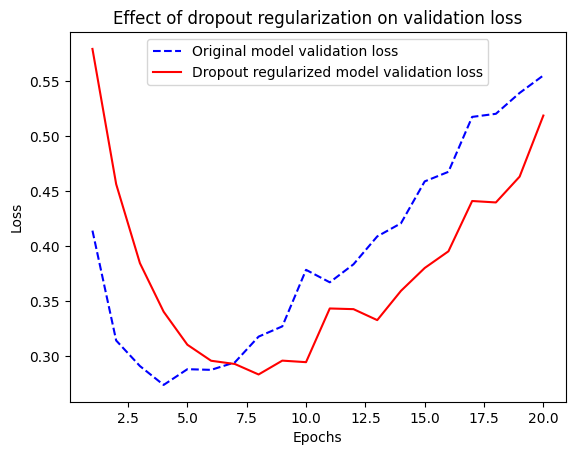

In [23]:
# history_dict = history_original.history
history_dict_dropout = history_dropout.history

# Get loss values
val_loss_values = history_dict["val_loss"]
dropout_val_loss_values = history_dict_dropout["val_loss"]

epochs = range(1, len(val_loss_values) + 1)

# Original model plots
plt.plot(epochs, val_loss_values, "b--", label="Original model validation loss")  #

plt.plot(epochs, dropout_val_loss_values, "r", label="Dropout regularized model validation loss")  # solid red line




plt.title("Effect of dropout regularization on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

Most common ways to improve generalization and prevent overfitting:

- Get more or better training data.
- Feature engineering.
- Reduce capacity of the model.
- Add weight regularization for smaller models.
- Add dropout for larger models.

# Summary

- Main purpose of ML models: *generalize*.
- Generalization is achieved by learning a parametric model that can *interpolate* between training samples: such a model is said to have learned the "latent manifold" of the training data.
- Fundamental problem in ML: *the tension between optimization and generalization*
  - to attain generalization, you must first achieve a good fit to the training data, but improving your model’s fit to the training data will inevitably start hurting generalization after a while. Every single deep learning best practice deals with managing this tension.
- Essential to have an accurate evaluation of the generalization power:
  - Simple holdout validation
  - K-fold validation
  - Iterated K-fold validation
  - Always keep test set competely separate.
- First goal: a model that has some generalization power and can overfit. Done by:
  - Tuning learning rate, batch size
  - Leveraging better architecture priors
  - Increasing model capacity
  - Training longer
- Once model starts overfitting, now goal is to improve generalization by *model regularization*.
  - Reduce model's capacity
  - Add dropout or weight regularization
  - Use early stopping
  - Naturally, a larger/better dataset is always best way to help a model generalize.